In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:

sns.set(style="white")
#Cargar dataset 
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')



In [4]:
#Mostras las primeras 5 filas del dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Mostrar informacion del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Eliminar registros duplicados
print("Registros duplicados antes de eliminar:", df.duplicated().sum())
df = df.drop_duplicates()
print("Registros duplicados despues de eliminar:", df.duplicated().sum())

Registros duplicados antes de eliminar: 0
Registros duplicados despues de eliminar: 0


In [7]:
#Se convierte la columna 'TotalCharges' a numerica ya que se encuentra como object
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [8]:
#modificar mayusculas a minusculas y eliminar espacios y "_" en los nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [10]:
#Luego de revisar el archivo csv,se detectan las columnas categoricas para limpiar y estandarizarlas, asi no tener problemas en el analisis

colmn_reemplazo = ['gender','partner','dependents','phoneservice','multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection',
                   'techsupport','streamingtv','streamingmovies','contract','paperlessbilling','paymentmethod','churn']

for col in colmn_reemplazo:
    df[col] = df[col].str.lower().str.strip()

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-GNVDE,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,3668-QPYBK,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-CFOCW,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-HQITU,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [11]:
#Ahora debemos detectar si existen valores faltantes en las columnas
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [12]:
#Para no afectar tanto el sesgo de los valores de la columna totalcharges, se rellenara los valores vacios por la mediana.
df['totalcharges'] = df['totalcharges'].fillna(df['totalcharges'].median())

#Comprobamos nuevamente si existen valores nulos
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [13]:
print(df.describe())

       seniorcitizen       tenure  monthlycharges  totalcharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


In [14]:

#Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).
#En este caso se comprobará si un cliente no tiene servicio telefonico no debería tener multiples lineas telefonicas
df[(df['phoneservice'] == 'no') & (df['multiplelines'] != 'no phone service')]


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


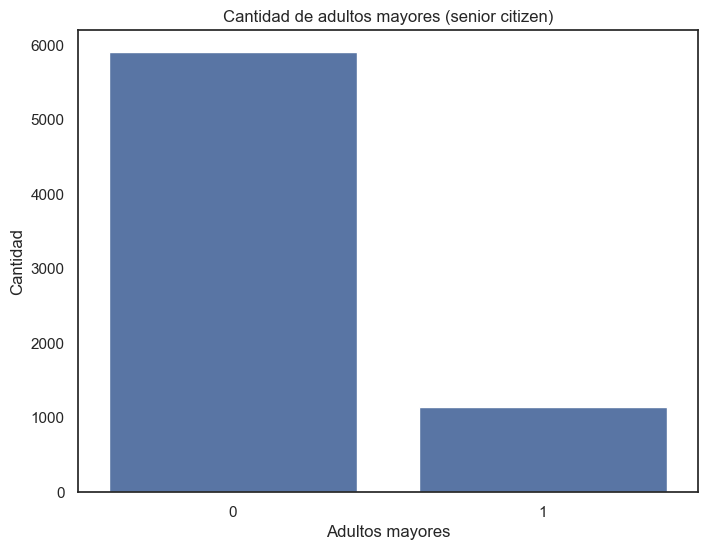

In [15]:
#Calcular cantidad de seniorcitizen

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='seniorcitizen')
plt.title('Cantidad de adultos mayores (senior citizen)')
plt.xlabel('Adultos mayores')
plt.ylabel('Cantidad')
plt.show()

#Se puede notar que la cantidad de senior citizen (Adultos mayores) que tienen contratados servicios no es tan alta.

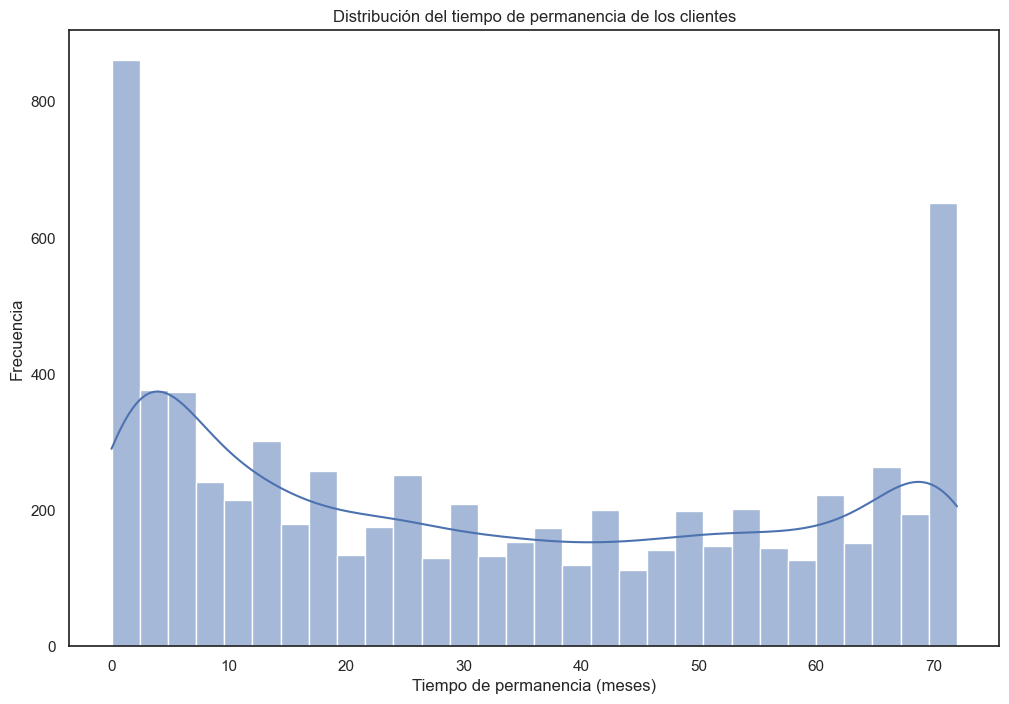

In [16]:


#Crear dos diferentes visualizaciones

#Se crea una visualización que muestra el tiempo de permanencia de los clientes
plt.figure(figsize=(12, 8))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribución del tiempo de permanencia de los clientes')
plt.xlabel('Tiempo de permanencia (meses)')
plt.ylabel('Frecuencia')
plt.show()

#Se puede notar que existe una alta cantidad de clientes que permanence solo los primeros meses, debe mejorarse la fidelización de los usuarios
#Esto podría realizarse con mejores descuentos por implementación de servicios (por ejemplo, al contratar el servicio de fibra optica tener un servicio de streaming gratuito)


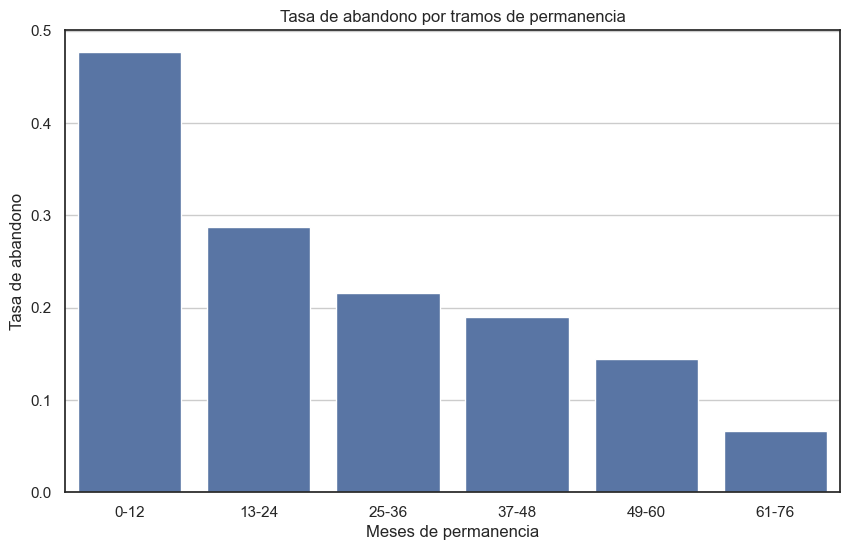

In [17]:
#Para calcular la tasa de abandono por cantidad de meses de permanencia primero se debe pasar el valor "yes,no" a numerico, en este caso será 1 y 0.
df['abandono'] = df['churn'].map({'yes': 1, 'no': 0})

#Se crea un grupo de permanencia, el cual estara dividio en bloques para detallar mejor esta información
df['permanencia'] = pd.cut(df['tenure'], 
                           bins=[0, 12, 24, 36, 48, 60, 76], 
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-76'])

# Calcular la tasa de abandono promedio en cada tramo de permanencia
churn_rate_by_tenure = df.groupby('permanencia', observed=True)['abandono'].mean().reset_index()

# Se realiza el grafico de barras con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_rate_by_tenure, x='permanencia', y='abandono')

# Se configura el grafico 
plt.title('Tasa de abandono por tramos de permanencia')
plt.xlabel('Meses de permanencia')
plt.ylabel('Tasa de abandono')
plt.grid(axis='y')
plt.show()

#Al comparar estos dos datos (permanencia y tasa de abandono de los usuarios) se puede notar que un poco menos 50% de los usuarios que se integran
#a la empresa abandonan entre el primer año de contrato.
#Además se puede destacar que mientras mas meses de permanencia tienen los clientes menor es su abandono.
#Este dato puede mostrar que existe una buena fidelización de los usuarios a largo plazo, pero que se debe realizar algún metodo para aumentar la fidelización en los primeros meses.


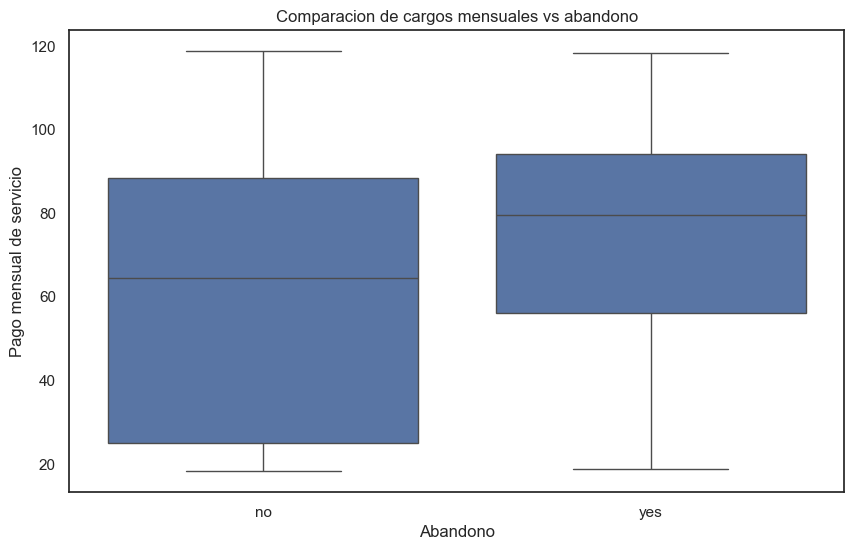

In [34]:
#Comparacion cargos mensuales vs abandono

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='monthlycharges', data=df)
plt.title("Comparacion de cargos mensuales vs abandono")
plt.xlabel("Abandono")
plt.ylabel("Pago mensual de servicio")
plt.show()

#En este diagrama de caja se puede destacar que los clientes que pagan mas mensualemente tienen mayor probabilidad de abandonar el servicio.
#Es probable que el pago de servicios de alto costo influya en el abondono de estos clientes, ya que
#Los clientes que pagan menos tienden a quedarse mas.